In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [44]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [45]:
x_train=x_train/255
x_test=x_test/255

In [46]:
np.unique(y_train)
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [47]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
hist=model.fit(x_train,y_train,epochs=2,batch_size=64,validation_split=0.1)

Epoch 1/2
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9370 - loss: 0.1694 - val_accuracy: 0.9078 - val_loss: 0.2566
Epoch 2/2
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9422 - loss: 0.1543 - val_accuracy: 0.9137 - val_loss: 0.2511


Text(0, 0.5, 'Loss')

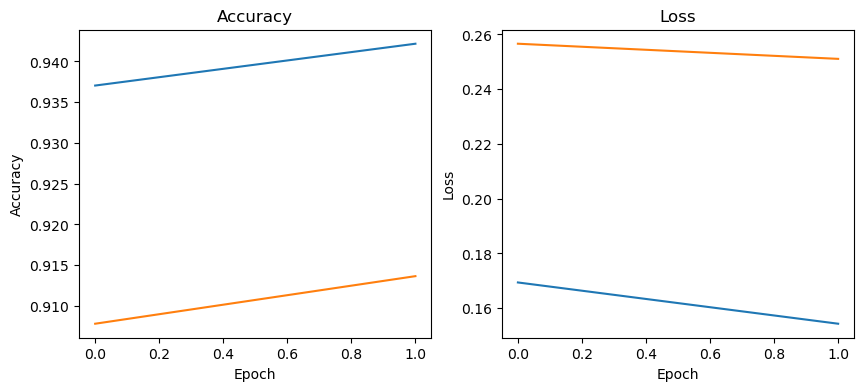

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label='Train')
plt.plot(hist.history['val_loss'],label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053,920 (4.02 MB)

 Trainable params: 351,306 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 702,614 (2.68 MB)

In [32]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print('Test Accuracy:',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9087 - loss: 0.3229
Test Accuracy: 0.9086999893188477


In [38]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(0.5, 1.0, 'Predicted:Coat\nActual:Coat')

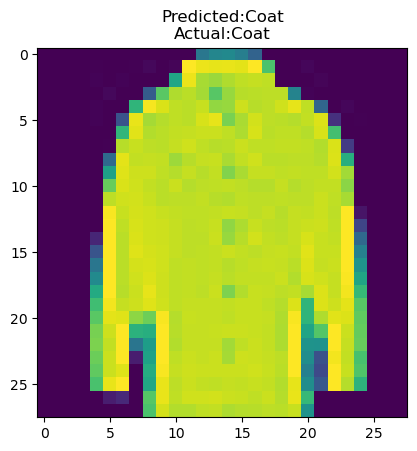

In [42]:
test_item=14
plt.imshow(x_test[test_item])
plt.title(
f"Predicted:{class_names[predictions[test_item].argmax()]}\n"
f"Actual:{class_names[y_test[test_item]]}"
)